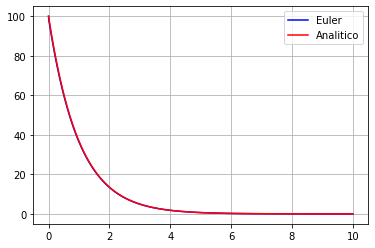

In [15]:
# Questão 1

import numpy as np
import matplotlib.pyplot as plt

N0 = 100
tau = 1
deltat = 0.01
def Nu(t):
    y = N0*np.exp(-t/tau)
    return y

tempo = [0]
N = [N0]
N_analitico = [N0]
for i in range(1000):
    tempo.append(tempo[-1]+deltat)
    N.append(Nu(tempo[-1])-Nu(tempo[-1])*deltat/tau)
    N_analitico.append(N0*np.exp(-tempo[-1]/tau))





plt.plot(tempo, N, color='blue', label='Euler')
plt.plot(tempo, N_analitico, color='red', label='Analitico')
plt.grid()
plt.legend()

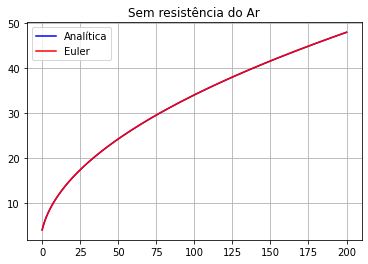

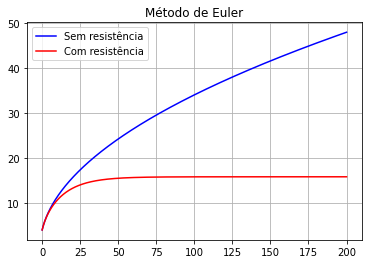

In [35]:
# Exercício 2
# Sem resistencia
import numpy as np
import matplotlib.pyplot as plt

def fa(x) :
    return np.sqrt(16 + ((2*400*x)/70))

P = 400
m = 70
v = np.array([4])
h = 0.1
n = int(200/h)
t = np.linspace(0, 200, n+1)

for i in range(1, n+1) :
    v = np.append(v, (v[i-1] + (h*(P/(m*v[i-1]))) ) )

plt.plot(t, fa(t), color='blue', label='Analítica')
plt.plot(t, v, color='red', label='Euler')
plt.title("Sem resistência do Ar")
plt.legend()
plt.grid(True)
plt.show()
 
# Com resistencia
A = 0.33
C = 0.5
ro = 1.225
vr = np.array([4])

for i in range(1, n+1) :
    v2 = (vr[i-1])**2
    Fs = P / (m*vr[i-1])
    Fr = -(1/(2*m)) * (C*ro*A*v2)
    F = Fs + Fr
    y = vr[i-1] + h*F
    vr = np.append(vr, y)
    
plt.plot(t, fa(t), color='blue', label='Sem resistência')
plt.plot(t, vr, color='red', label='Com resistência')
plt.legend()
plt.grid(True)
plt.title("Método de Euler")
plt.show()

O ângulo que percorreu maior distâcia horinzontal foi:  40 graus!


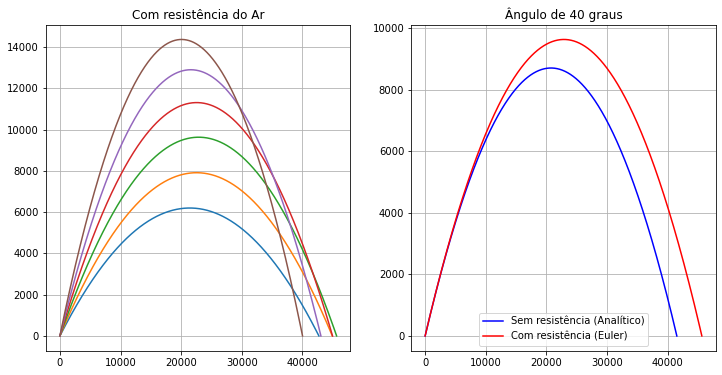

In [27]:
import numpy as np
import matplotlib.pyplot as plt

v = 700
alpha = [30, 35, 40, 45, 50, 55]
angulo = []
B2 = 4e-5
deltat = 0.01
x = [[0],[0],[0],[0],[0],[0]]
y = [[0],[0],[0],[0],[0],[0]]
m = 100
g = 9.81


# graus para rad
for i in range(len(alpha)):
    angulo.append(0.01745 * alpha[i])

for j in range(0,len(angulo)):
    vx = np.cos(angulo[j])*v
    vy = np.sin(angulo[j])*v
    for i in range(0,100000):
        if y[j][i] < 0:
            break
        else:
            vx = vx - (B2*v*vx*deltat)/m
            vy = vy - (B2*v*vy*deltat)/m - g*deltat
            v = np.sqrt(vx**2+vy**2)
            x[j].append(x[j][-1]+vx*deltat)
            y[j].append(y[j][-1]+vy*deltat)

plt.figure(figsize = ((12, 6)))
plt.subplot(1, 2, 1)
for i in range(len(angulo)):
    plt.plot(x[i],y[i])
    plt.grid(True)
    plt.title("Com resistência do Ar")
    if x[i][-1] > x[i-1][-1]:
        a = alpha[i]

print("O ângulo que percorreu maior distâcia horinzontal foi: ", a, "graus!")
            
#Solução analítica sem resistência do ar
x_analitico = [0]
y_analitico = [0]
vx = np.cos(angulo[2])*v
vy = np.sin(angulo[2])*v
for i in range(10000):
    if y_analitico[-1] < 0:
        break
    else:
        vy = vy - g*deltat
        v = np.sqrt(vx**2+vy**2)
        x_analitico.append(x_analitico[-1]+vx*deltat)
        y_analitico.append(y_analitico[-1]+vy*deltat)
plt.subplot(1, 2, 2)
plt.title("Ângulo de 40 graus")
plt.plot(x_analitico, y_analitico, color='blue', label='Sem resistência (Analítico)')
plt.plot(x[2], y[2], color='red', label='Com resistência (Euler)')
plt.grid()
plt.legend()